# En este programa analizaremos los resultados que nos dieron Hill Climbing V1 y Recocido con Epsilon = 1 y Evolucion diferencial con Epsilon = 1, Taza de Cruza 0.4 y Factor de Mutacion 0.6 que fueron los que me dieron los mejores resultados 

### Nota: Se realizaron varias veces los experimentos y se busco la solucion que más veces se repetia para los tres algoritmos con y sin semilla escogiendo esta corrida de datos sin semilla.

In [1]:
import pandas as pd
import seaborn as sns

#### Importamos los datos de Hill Climbing

In [2]:
HCv1 = pd.read_csv("hill_climbing.csv")
HCv1.head()

,Costo,Tiempo
0,434.279518,0.004361
1,473.786310,0.003657
2,118.439207,0.004798
3,118.438478,0.004519
4,236.876731,0.004319


#### Importamos los datos de Recocido

In [3]:
RSv1 = pd.read_csv("recocido.csv")
RSv1.head()

,Costo,Tiempo
0,394.899986,0.149848
1,434.279396,0.122841
2,473.786297,0.121952
3,434.279367,0.156958
4,513.246431,0.130162


#### Importamos los datos de Evolucion diferencial

In [4]:
ED = pd.read_csv("evol_dif.csv")
ED.head()

,Costo,Tiempo
0,0.000025,0.146292
1,0.000025,0.152269
2,0.000025,0.150708
3,0.000025,0.153266
4,0.000025,0.149815


#### Reportamos los datos que se piden para la Hill Climbing  (Promedio,Desviacion Estandar)

In [5]:
print("Resultados Hill Climbing","\nPromedio: ",HCv1.Costo.mean(),"\nDesviacion Estandar: ",HCv1.Costo.std())

Resultados Hill Climbing 
Promedio:  407.89482367943026 
Desviacion Estandar:  144.84073249692713


#### Reportamos los datos que se piden para Recocido (Promedio,Desviacion Estandar)

In [6]:
print("Resultados Recocido","\nPromedio: ",RSv1.Costo.mean(),"\nDesviacion Estandar: ",RSv1.Costo.std())

Resultados Recocido 
Promedio:  385.01095490082207 
Desviacion Estandar:  168.96584817217422


#### Reportamos los datos que se piden para Evolucion Diferencial (Promedio,Desviacion Estandar)

In [7]:
print("Resultados Evolucion Diferecial","\nPromedio: ",ED.Costo.mean(),"\nDesviacion Estandar: ",ED.Costo.std())

Resultados Evolucion Diferecial 
Promedio:  27.29164590256479 
Desviacion Estandar:  53.345769706933396


#### Realizaremos el diagrama de cajas de las variantes de los algoritmos

In [9]:
costov1 = HCv1[['Costo']]
costov2 = RSv1[['Costo']]
costov3 = (ED[['Costo']]).copy()
costov3.rename(columns={'Costo':'Costo_EvolDif'},inplace=True)
costos = costov1.join(costov2,lsuffix='_HillClimbing', rsuffix='_Recocido')
costos = costos.join(costov3)
costos.head()

,Costo_HillClimbing,Costo_Recocido,Costo_EvolDif
0,434.279518,394.899986,0.000025
1,473.786310,434.279396,0.000025
2,118.439207,473.786297,0.000025
3,118.438478,434.279367,0.000025
4,236.876731,513.246431,0.000025


[Text(0, 0.5, 'Mejor costo')]

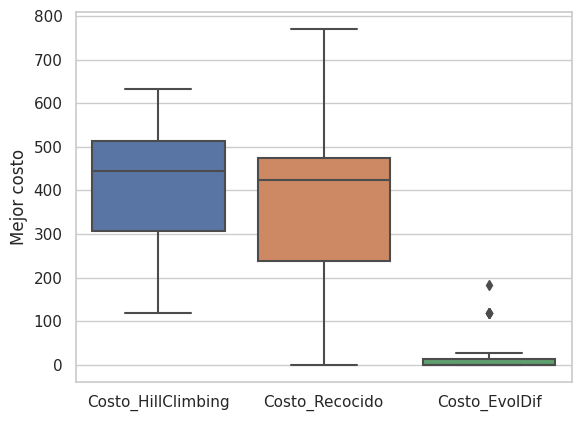

In [ ]:
sns.set_theme(style="whitegrid")
boxplot2 = sns.boxplot(data=costos)
boxplot2.set(ylabel='Mejor costo')

#### Tiempo Promedio


In [10]:
print("Tiempo promedio Hill Climbing: ",HCv1.Tiempo.mean(),"\nTiempo promedio Recocido: ",RSv1.Tiempo.mean(),"\nTiempo promedio Evolucion Diferencial: ",ED.Tiempo.mean())

Tiempo promedio Hill Climbing:  0.0045123338699340374 
Tiempo promedio Recocido:  0.12896823883056638 
Tiempo promedio Evolucion Diferencial:  0.153222378094991


#### Basandonos en los datos que pudimos obtener
#### En este caso elegiriamos el algoritmo de evolucion diferencial por las siguientes caracteristicas del algoritmo
 
##### 1.-Sus datos estan menos dispersos en comparacion con los otros dos algoritmos
##### 2.-Por tener el promedio mas bajo en costo se acerca más al minimo global
##### 3.-Aproximadamente solo un 5% de los datos de recocido son comparables con los de evolucion diferencial y sabiamos que recocido era mejor que hillclimbing.
#### 4.-Sabemos que de nuestra muestra que cada resultado de costo de evolucion diferencial va a ser mejor el 75% de las veces que si aplicaramos cualquiera de los otros dos algoritmos 
##### 4.-Y a pesar de que toma mas tiempo que cualquiera de los otros dos algoritmos, sigue siendo imperceptible en tiempo humano para este problema por lo que no considero que sea un factor discriminante para usar este algoritmo.